# Apple Stock Analysis

![](https://d1iqudb2hg8ayl.cloudfront.net/storage/uploads/images/news/1677228091067.jpg)

---

Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue and, since January 2021, the world's most valuable company. 

# Dataset Description

Was taken from https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021. This dataset provides historical data of APPLE INC. stock (AAPL). The data is available at a daily level. Currency is USD. Originally this dataset contain 6 features (we only take 5 features) and 10409 record overall, which the price stock was started from 12 December 1980 until 24 March 2020. The 5 feature that we take namely:
- Open: The price at which the stock first trades when the market opens on a given day. This represents the initial price at which the stock is traded that day.
- Low: The lowest price reached by the stock during the trading session on a given day. This reflects the lowest level the stock's price fell to throughout the day.
- High: The highest price reached by the stock during the trading session on that day, showing the peak price the stock achieved during the day.
- Close: The last price at which the stock is traded before the market closes for the day. This is the price most commonly used as a daily reference for the stock.
- Adj Close (Adjusted Close): The closing price adjusted to reflect factors such as dividends, stock splits, or other corporate actions. This provides a more accurate view of the stock's real value, particularly useful for long-term analysis.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
df_stock = pd.read_csv('..\\dataset\\AAPL.csv')

In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [6]:
# Let's see how many shares of the Apple inc in early 1980s
df_stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [8]:
# Then how many shares of the Apple inc the end of 2022s?
df_stock.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700


Such a significant increase!

In [10]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format=r'%Y-%m-%d')

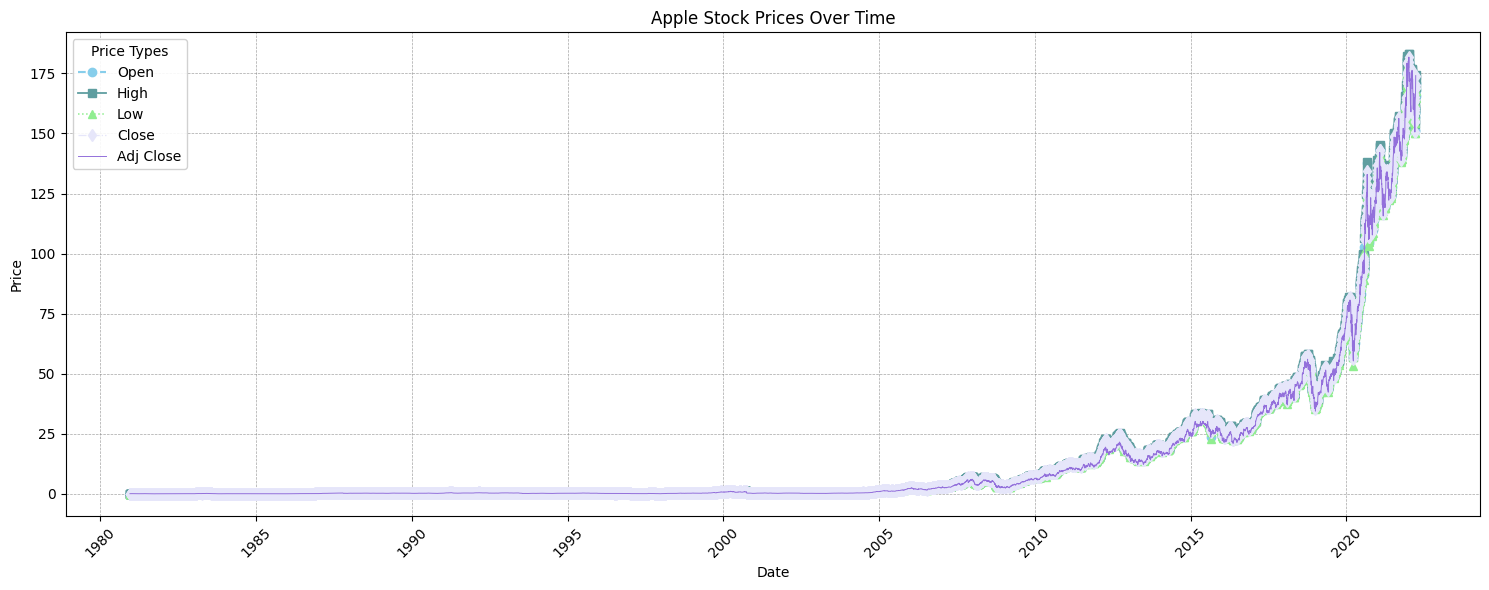

In [41]:
# To make it clearer let's see this line plot

plt.figure(figsize=(15, 6))
plt.plot(df_stock['Date'], df_stock['Open'], label='Open', linestyle='--', marker='o', linewidth=1.5, markersize=6, color='skyblue')
plt.plot(df_stock['Date'], df_stock['High'], label='High', linestyle='-', marker='s', linewidth=1.3, markersize=6, color='cadetblue')
plt.plot(df_stock['Date'], df_stock['Low'], label='Low', linestyle=':', marker='^', linewidth=1.1, markersize=6, color='lightgreen')
plt.plot(df_stock['Date'], df_stock['Close'], label='Close', linestyle='-.', marker='d', linewidth=0.9, markersize=6, color='lavender')
plt.plot(df_stock['Date'], df_stock['Adj Close'], label='Adj Close', linestyle='-', linewidth=0.7, markersize=6, color='mediumpurple')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, title="Price Types")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Stock Prices Over Time")
plt.tight_layout()
plt.show()

Let's deep dive into the distribution analysis

# Number of Days the Stock Price Rises or Falls

In [ ]:
"""
To find out this, we can use discrete probability distribution
let's start with Open Price feature
"""
df_copy = df_stock.copy()
df_copy['open_diff'] = df_copy['Open'].diff()

df_copy['open_status'] = df_copy['open_diff'].apply(lambda x: 'Rise' if x > 0 else ('Falls' if x < 0 else 'Settled'))

status_counts = df_copy['open_status'].value_counts()

status_probabilities = status_counts / len(df_copy)

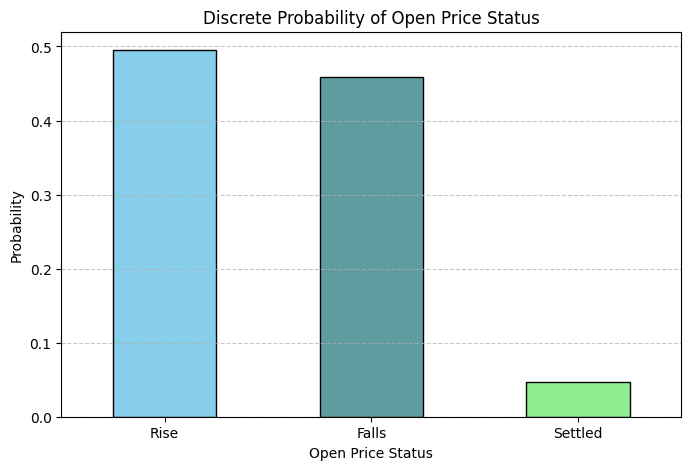

In [43]:
# Create the plot
plt.figure(figsize=(8, 5))
status_probabilities.plot(kind='bar', color=['skyblue', 'cadetblue', 'lightgreen'], edgecolor='black')

# Adjust the title & label
plt.title("Discrete Probability of Open Price Status")
plt.xlabel("Open Price Status")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Daily Return

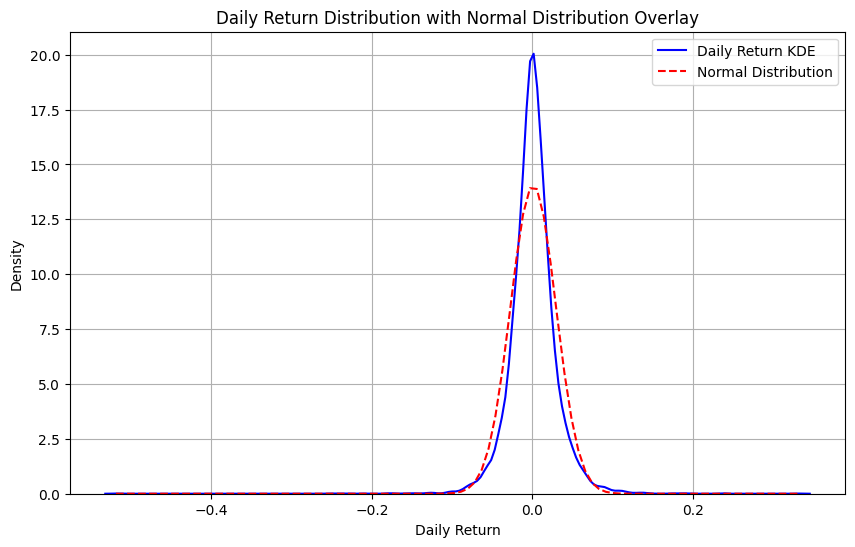

In [48]:
df_copy['daily_return'] = df_copy['Close'].pct_change()  # Menghitung return harian sebagai persentase perubahan

# Menghapus NaN yang dihasilkan dari perhitungan pct_change()
daily_returns = df_copy['daily_return'].dropna()

# Visualisasi distribusi return harian dengan KDE dan distribusi Normal
plt.figure(figsize=(10, 6))

# Plot KDE untuk return harian
sns.kdeplot(daily_returns, color='blue', label='Daily Return KDE')

# Menghitung mean dan std dari return harian
mean_return = daily_returns.mean()
std_return = daily_returns.std()

# Plot distribusi Normal dengan parameter mean dan std dari return harian
x = np.linspace(daily_returns.min(), daily_returns.max(), 100)
plt.plot(x, norm.pdf(x, mean_return, std_return), color='red', linestyle='--', label='Normal Distribution')

# Menambahkan label, judul, dan legenda
plt.title("Daily Return Distribution with Normal Distribution Overlay")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.show()